# Name: Michael Pallante
# Date: Friday 03/27/2020

This test is split into three main sections and involves an SQL question, some programming challenges, and a predictive modelling scenario. 
There is no time limit, however time taken to complete will be considered. Expectation is around 1 hour but we do prefer complete answers over rushed/skipped questions due to time constraints.

Requirements:
-	Access to a programming language, such as R or Python
-	Excel

# Data Science Competency Test

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import sqlite3
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = "whitegrid")
pd.options.display.max_columns = 100

## Task 1

### Please refer to ‘SQL Data.csv’ for part A. Answer the questions inline in the document and feel free to show you working out.

#### A.	Write a query that shows the most recent deposit method, date, and amount for each ‘Username’.

In [2]:
#Connect to SQL_Data database
conn = sqlite3.connect('SQL_Data.db')

#Importing SQL_Data Into Pandas
players = pd.read_sql_query("select * from Players;", conn)
deposits = pd.read_sql_query("select * from Deposits;", conn)

#Merging Data Using Pandas
sql_data = pd.merge(players, deposits, on = 'PlayerID')
sql_data

#Show most recent deposit method, date, and amount for each username
sql_data = sql_data[['UserName', 'DepDate', 'Method', 'Amount']]
sql_data.sort_values(by="DepDate").drop_duplicates(subset=["UserName"], keep="last")

,UserName,DepDate,Method,Amount
0,poker_poker,1/1/17,Card,100
6,IMALLIN,1/2/17,Card,50
7,itisproblem,1/2/17,Cheque,65
2,CheckRaiser,1/3/17,Card,100
5,Cadillac,1/3/17,Wallet,75


#### B.	Assume the probability of winning a single hand of Blackjack is 42%. If a player was to play 10 hands of Blackjack, what is the probability of winning exactly 7 hands.

In [3]:
#Create function to find probability of winning blackjack hands
def probability_of_winning_w(n, p, w):
    """
    n = number of hands played
    p = probability of winning a hand
    w = number of hands won
    
    Use np.factorial()
    
    """
    
    # defining a helper function for factorial
    def fact(n):
        return np.math.factorial(n)
    
    return (fact(n)/(fact(w)*fact(n-w)))*(p**(w))*((1-p)**(n-w))

#Entering values of n (number of hands played), p (probability of winning a hand), and w (number of hands won)
n = 10
p = 0.42
w = 7

#Find probability of winning exactly 7 hands out of 10 hands played
probability_of_winning_w(n, p, w)

0.053977188466420536

#### C.	A factory produces decks of playing cards and has an automated test to flag faulty products for further inspection. Consider the following statistics:

-	1% of all decks are faulty.
-	90% of faulty decks test positive.
-	The test incorrectly flags 5% of non-faulty decks as being faulty

#### Suppose you get a positive result from the test, what is the probability of the deck being faulty?

In [4]:
#Enter given values from above
prob_a = 0.01
prob_b_given_a = 0.90
prob_b = (prob_a * prob_b_given_a) + (0.99 * 0.05)

#Find the probability of the deck being faulty using Bayes Theorem
prob_a_given_b = (prob_a * prob_b_given_a) / prob_b
prob_a_given_b

0.15384615384615385

## Task 2

### Please complete using a programming language, preferably Python or R. Provide your answers inline in the document. In addition, please provide your script in a separate file.

#### Refer to ‘Test_Data.csv’ for this exercise, and also Task 3. Details of this data are as follows:

-	The data is a daily snapshot of 5000 customers.
-	‘Activity’ signifies whether the customer remained active (or churned) within the next n days.
-	Fields X1-X10 contain Poker data for various time intervals.
-	Fields X11-X20 contain Casino data for various time intervals.
-	Fields X21-X30 contain Sports Book data for various time intervals.

#### Please carry out the following operation, and provide answers if requested.

In [5]:
#Import Test_Data
test_data = pd.read_csv('Test_Data.csv')

#### A.	Calculate the mean and 95% confidence interval for X2.

In [6]:
#Calculate the mean for X2
test_data['X2'].mean()

312.02424874964004

In [7]:
#Create function to calculate the 95% confidence interval for X2

def confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

#Calculate the 95% confidence interval for X2
confidence_interval(test_data['X2'], confidence=0.95)

(310.47165323060443, 313.57684426867564)

#### B. Provide a histogram plot of X5 and describe the distribution.

Text(0.5, 1.0, 'Histogram Plot of X5')

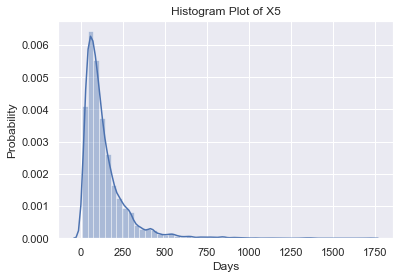

In [8]:
#Create histogram plot of X5

sns.set_style('darkgrid')
sns.distplot(test_data['X5'])
plt.xlabel('Days')
plt.ylabel('Probability')
plt.title('Histogram Plot of X5')

The histogram plot of X5 shows a right-skewed distribution, which also means that the distribution is positively skewed.

#### C. Identify the missing values (column names + indices).

In [9]:
#Calculate the number of missing values within each column
test_data.isna().sum()

Activity    0
Country     0
X1          0
X2          0
X3          3
X4          0
X5          0
X6          0
X7          1
X8          0
X9          1
X10         0
X11         0
X12         0
X13         0
X14         0
X15         0
X16         0
X17         0
X18         0
X19         0
X20         0
X21         0
X22         0
X23         0
X24         0
X25         0
X26         0
X27         0
X28         0
X29         0
X30         0
dtype: int64

In [10]:
test_data.loc[test_data[['X3','X7', 'X9']].isnull().any(1)].index

Int64Index([204, 2345, 4194, 4723, 4798], dtype='int64')

The following columns contain missing values:

- X3: 3 missing values
- X7: 1 missing value
- X9: 1 missing value

The indices containing missing values include:

- 204
- 2345
- 4194
- 4723
- 4798

#### D. Replace the ‘Country’ column with dummy variables.

In [11]:
#Create Country dummy variables
country_dummies = pd.get_dummies(test_data['Country'])

#Append Country dummy variables to Test_Data, creating new Test_Data dataframe called Test_Data_New
test_data_new = pd.concat([test_data, country_dummies], axis = 1)

#Remove original Country variable from new Test_Data, creating final Test_Data dataframe called Test_Data_Final
test_data_final = test_data_new.drop(['Country'], axis = 1)

#### E. Provide a function that takes an integer and outputs ‘Poker’ if divisible by 3, ‘Stars’ if divisible by 5, and ’Pokerstars’ otherwise.

In [12]:
#Create above function
def int_function(i):
        if i % 3 == 0:
            return("Poker")
        if i % 5 == 0:
            return("Stars")
        else: 
            return("Pokerstars")

## Task 3

### Please outline the steps you would take to build a model to predict ‘Activity’. No coding or analysis is expected in this question, it is purely theoretical. Consider the following points:

#### How you would explore the data.

- Exploratory Data Analysis is key in providing us a greater understanding of our data before the modelling phase and should give us some initial inclinations and assumptions regarding our data. Reviewing statistics and visualizations of the data help with initial interpretation of our data. 
- We would take into consideration all possible details and given information that we know about the dataset already. For example, we know the data contains 5000 total observations. We know that if we are building a model to predict Activity that Activity is our response variable. We also know that variables X1-X10 represent Poker data, variables X11-X20 represent Casino data, and variables X21-X30 represent Sports Book data. Additionally, we know which Country the customers are betting from. These variables must all be considered as possible feature variables to be used within our model.
- We check the dataset for missing data.
- We check the descriptive statistics of the data: mean, minimum, maximum, standard deviation. We should check for outliers as well. Extreme outliers need ot be taken note of. We can create some visualizations to aid us in seeing what the data looks like and check the variance of our data.
- We consider the data types within the dataset. Activity and Country are categorical variables, while all other variables are numerical and include float values. For Activity in particular, this is important to note because given that it is a categorical variable, this will influence the type of model we use. We also need to understand our response variable-- we note that if a customer remained active, they are classified as a 1, while customers who did not remain active are classified as a 0.
- We also see something that may require further inspection and possibly more of an explanation: there are many 0 values within our numerical variables as well. It would be wise to gather more details on this so we know how to proceed with this data. It would also be nice if we had further explanation of each of our X variables to aid our interpretation.
- We can review correlaton matrices to determine what to do with correlated variables.
- We can check the distribution plots of our variables for linearity and skewness.
- We use the above methods to determine feature selection. We can also consider feature selection methods such as recursive feature elimination, which removes the weakest features of our model for us. However this does not test all of our models so using this method after narrowing down to just a few models might be a better idea.

#### How you would prepare the data.

- We need to ensure that our data is cleaned and transformed where necessary prior to modelling.
- We need to decide what to do with our missing data. Fortunately in this case, there are very few missing values within our dataset. We still need to decide whether or not we will be using imputation methods or if we are removing this data entirely. Both approaches could be justified given how few missing values we have. If we consider this data to be valuable to our evaluation of Activity, then we should impute these missing values. We could use regression imputation that uses our existing dataset to predict what those values might have been. This maintains a randomness factor that mean or median imputation cannot do. It is a more time consuming approach, but might lend to better accuracy. If time is a major consideration, mean or median imputation could be considered. If we don't mind excluding a few observations from our analysis, then removing the missing values altogether is fine, as there are so few and we would not be adding bias to our dataset.
- We need to decide whether or not we need to perform any data transformations. In this particular case, it makes sense to 'dummy' the Country variable since it is a categorical variable and there are multiple different countries included. Giving each country their own unique variable helps gives us a few more features for our model and could also lend to improved accuracy.

#### How you would approach modelling.

- Due to the fact that our response variable, Activity, is a categorical variable, we know that we should likely employ a classification model. There are a number of model types we can consider for evaluation purposes. The way I would approach it is that we can build a pipeline that runs a number of models on the dataset all at once. Model types in this case could include logistic regression, random forest, decision trees, ada boost, gradient boosting, KNN, SVC, and Nu-SVC.
- Before running our pipeline, if we identify class imbalance with our data, we can consider using SMOTE to address our class imbalance issues.
- After running our pipeline, we will be able to see which classification model type offers the best model performance with this specific dataset.
- After running our pipeline, we can also consider using GridSearchCV or randomized search CV to improve model performance.
- After running our pipeline, we can also consider using hyperparameter tuning to improve model performance.

#### What techniques would you use to evaluate performance?

- There a number of performance metrics that we could consider i.e. accuracy, precision, recall, f-1 score. However, the one we select as our optimized metric will always depend on the data we are analyzing. We must refer to the confusion matrix to evaluate actual vs predicted values. For example, if I am an NFL agent and I want have to inform my client (the player) a projection of his potential draft status, precision is our preferred metric because in our model, false positives are worse than false negatives-- we don’t want to inform a player that they will get drafted and then they actually don’t. We want to be conservative and very sure in our recommendations to players, and want to avoid offering incorrect projections as much as possible. In most cases, we prefer accuracy as our optimized metric, as accuracy gives us the number of correct predictions in our model. We would likely use Accuracy as our optimized metric for our Activity model.
- In terms of determining which of our feature variables have the most predictive power of our response variable, Accuracy, we can run our logistic regression model and evaluate the coefficients of each variable. Doing this will allow us to see which feature variables are of most statistical significant, as well as whic variables are either helping or hurting our model performance. This is also an opportunity for us to decide if we would like to make changes to our model and add or remove more feature variables.

#### If you were to undertake this project for real, what real life data would you utilize?

- There are a number of directions we can go to aid our evaluation of Activity. As always, if we were given more data to work with, we might be able to more accurately predict Activity. For example, the amount of money the player spent and the players' income might give us a good idea of how much the player typically spends and how much they can afford to spend. It wouldn't be surprising to see players who have more money and spend more of that money are more likely to be more active than players who don't have a lot of money or don't spend a lot of money. This is an assumption, but it is a valid one to explore. It also wouldn't hurt to know the customer's history, as in how many days/months/years they have had an account. Also in terms of customer history, we would love to have data on past customer behavior, meaning number of transactions and how frequent those transactions are. Transaction frequency and recency would likely be one of the strongest predictors of future Activity. We would also benefit from knowing the amount of customer winnings and losses.

#### What else could we use the data for?

- Referencing my answer from above, if given the amount of money the players spend, we can use that as our response variable. In this case, we can predict how much a player will spend in the future. We can also dive further into it and predict the total number and frequency of future transactions of a customer, and even determine what game the player will spend it on i.e. sports gambling or casino gambling. Lastly, we could predict customer future winnings and losses. These ideas would give us a very strong understanding of our customer base and help us to improve decision-making and strategic planning from a business perspective going forward.